In [6]:
# Importing required libraries
import warnings  # To suppress warnings for clean output
warnings.filterwarnings('ignore')  # Ignore warnings

import os  # For interacting with the operating system, e.g., file paths
import librosa  # For audio processing (feature extraction, etc.)
import numpy as np  # For numerical operations and array manipulations
import matplotlib.pyplot as plt  # For plotting graphs, spectrograms, etc

import os
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Define the path where audio files are stored
path = 'Data/Audio/'

# Check if the provided directory exists and handle errors
if not os.path.exists(path):
    raise FileNotFoundError(f"The specified path does not exist: {path}")
else:
    print(f"Audio data will be loaded from: {path}")


Audio data will be loaded from: Data/Audio/


In [7]:
# Data preprocessing and exploration

import os

AUDIO_PATH = "Data/Audio"  # Define the root directory

# Ensure the directory exists
if not os.path.exists(AUDIO_PATH):
    raise FileNotFoundError(f"The directory {AUDIO_PATH} was not found!")

# List all subdirectories and files, and print out some basic info
audio_files = []  # List to store the paths of audio files

# Walk through all subdirectories and list files
for dirpath, _, filenames in os.walk(AUDIO_PATH):
    normalized_path = os.path.normpath(dirpath).replace("\\", "/")  # Ensure consistent path formatting
    file_count = sum(1 for _ in os.scandir(dirpath))  # Faster file count

    print(f"Directory: {normalized_path}")
    print(f"Total Files: {file_count}")
    
    # Collect audio files (assuming .wav and .mp3 files)
    for file in filenames:
        if file.lower().endswith(('.wav', '.mp3')):  # Filtering for audio files
            audio_files.append(os.path.join(dirpath, file))

print(f"\nTotal Audio Files Found: {len(audio_files)}\n")

# Quick sample of the first few file paths
print("Sample Audio Files:", audio_files[:5])


Directory: Data/Audio
Total Files: 3
Directory: Data/Audio/Female
Total Files: 2
Directory: Data/Audio/Female/PTDB-TUG
Total Files: 120
Directory: Data/Audio/Female/TMIT
Total Files: 205
Directory: Data/Audio/Male
Total Files: 2
Directory: Data/Audio/Male/PTDB-TUG
Total Files: 120
Directory: Data/Audio/Male/TMIT
Total Files: 64
Directory: Data/Audio/Noizeus
Total Files: 7
Directory: Data/Audio/Noizeus/Babble
Total Files: 30
Directory: Data/Audio/Noizeus/Car
Total Files: 30
Directory: Data/Audio/Noizeus/NoNoise
Total Files: 30
Directory: Data/Audio/Noizeus/Restaurant
Total Files: 30
Directory: Data/Audio/Noizeus/Station
Total Files: 30
Directory: Data/Audio/Noizeus/Street
Total Files: 30
Directory: Data/Audio/Noizeus/Train
Total Files: 30

Total Audio Files Found: 719

Sample Audio Files: ['Data/Audio\\Female\\PTDB-TUG\\mic_F01_sa2.wav', 'Data/Audio\\Female\\PTDB-TUG\\mic_F01_si454.wav', 'Data/Audio\\Female\\PTDB-TUG\\mic_F01_si473.wav', 'Data/Audio\\Female\\PTDB-TUG\\mic_F01_si502.wav'

Using root directory: Data/Audio

Checking directory: Data/Audio
Subdirectories: ['Female', 'Male', 'Noizeus']
Files: []

Checking directory: Data/Audio\Female
Subdirectories: ['PTDB-TUG', 'TMIT']
Files: []

Checking directory: Data/Audio\Female\PTDB-TUG
Subdirectories: []
Files: ['mic_F01_sa2.wav', 'mic_F01_si454.wav', 'mic_F01_si473.wav', 'mic_F01_si502.wav', 'mic_F01_si523.wav', 'mic_F01_si528.wav', 'mic_F01_si575.wav', 'mic_F01_si606.wav', 'mic_F01_si629.wav', 'mic_F01_si640.wav', 'mic_F01_sx16.wav', 'mic_F01_sx42.wav', 'mic_F02_sa1.wav', 'mic_F02_si654.wav', 'mic_F02_si675.wav', 'mic_F02_si698.wav', 'mic_F02_si737.wav', 'mic_F02_si772.wav', 'mic_F02_si790.wav', 'mic_F02_si791.wav', 'mic_F02_si817.wav', 'mic_F02_si822.wav', 'mic_F02_sx48.wav', 'mic_F02_sx86.wav', 'mic_F03_si1018.wav', 'mic_F03_si864.wav', 'mic_F03_si872.wav', 'mic_F03_si892.wav', 'mic_F03_si903.wav', 'mic_F03_si908.wav', 'mic_F03_si924.wav', 'mic_F03_si954.wav', 'mic_F03_si963.wav', 'mic_F03_si985.wav', 'mic_F03_sx

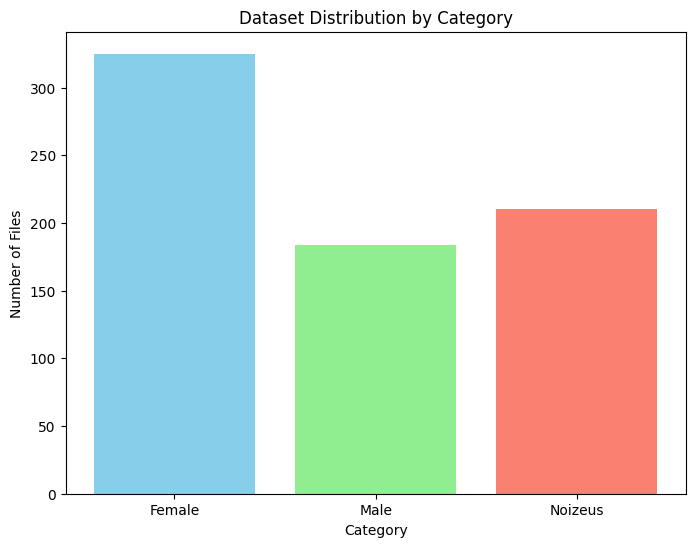

In [8]:
import os
import matplotlib.pyplot as plt

# Dataset Distribution Graph - Visualizing the distribution of audio files by category
def visualize_dataset_distribution(path, folders=["Female", "Male", "Noizeus"]):
    category_counts = {folder: 0 for folder in folders}  # Initialize category counts

    # Debug: Print the root path being used
    print(f"Using root directory: {path}\n")

    # Traverse directory and count files per category
    for dirpath, dirnames, filenames in os.walk(path):
        print(f"Checking directory: {dirpath}")  # Print current directory path
        print(f"Subdirectories: {dirnames}")  # Print subdirectories
        print(f"Files: {filenames}\n")  # Print files in the current directory

        for category in folders:
            if category in dirpath:  # Check if the directory contains a specified category
                category_counts[category] += len(filenames)

    # Debugging: Print out the category counts
    print("\nCategory Counts:", category_counts)

    # Plot dataset distribution
    plt.figure(figsize=(8, 6))
    categories = list(category_counts.keys())
    counts = list(category_counts.values())

    # Check if there are any non-zero counts for categories before plotting
    if sum(counts) > 0:
        plt.bar(categories, counts, color=['skyblue', 'lightgreen', 'salmon'])
        plt.title('Dataset Distribution by Category')
        plt.xlabel('Category')
        plt.ylabel('Number of Files')
        plt.show()
    else:
        print("No files found in the specified categories.")

# Ensure the correct path is used
audio_path = 'Data/Audio'  # Replace with your actual path if different

# Call the function to visualize the dataset distribution
visualize_dataset_distribution(audio_path)


Audio data will be loaded from: Data/Audio/

Audio File Count per Category:
  Female: 325
  Male: 184
  Noizeus: 210


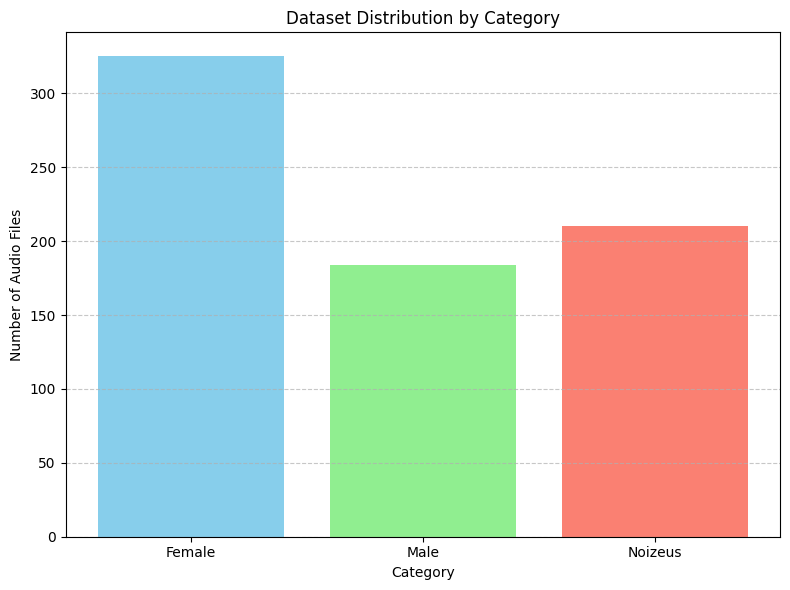

In [9]:
# Importing required libraries
import os
import warnings
import matplotlib.pyplot as plt

# Suppress warnings for clean output
warnings.filterwarnings('ignore')

# Define the path where audio files are stored
AUDIO_PATH = 'Data/Audio/'

# Check if the provided directory exists
if not os.path.exists(AUDIO_PATH):
    raise FileNotFoundError(f"The specified path does not exist: {AUDIO_PATH}")
else:
    print(f"Audio data will be loaded from: {AUDIO_PATH}\n")

# Function to visualize dataset distribution
def visualize_dataset_distribution(path, folders=["Female", "Male", "Noizeus"]):
    category_counts = {folder: 0 for folder in folders}  # Initialize category counts
  
    for dirpath, _, filenames in os.walk(path):
        for category in folders:
            if category in dirpath:
                category_counts[category] += sum(
                    1 for file in filenames if file.lower().endswith(('.wav', '.mp3'))
                )

    # Print category counts
    print("Audio File Count per Category:")
    for category, count in category_counts.items():
        print(f"  {category}: {count}")

    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.bar(category_counts.keys(), category_counts.values(), color=['skyblue', 'lightgreen', 'salmon'])
    plt.title('Dataset Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Audio Files')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function
visualize_dataset_distribution(AUDIO_PATH)


# Making Spectrogram for each voice


# import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Data Augmentation Functions
def add_noise(y, noise_factor=0.005):
    """Add random noise to an audio signal."""
    noise = np.random.randn(len(y)) * noise_factor
    return y + noise

def pitch_shift(y, sr, n_steps=2):
    """Shift the pitch of an audio signal."""
    return librosa.effects.pitch_shift(y, sr, n_steps=n_steps)

def time_stretch(y, rate=1.2):
    """Stretch or compress the time of an audio signal."""
    return librosa.effects.time_stretch(y, rate)

# Process and Save Spectrograms
root = 'spectrogram/'  # Root directory where spectrograms will be saved
folders = ["Female", "Male", "Noizeus"]  # List of categories to filter relevant audio files

# Traverse through the directory tree
for dirpath, dirnames, filenames in os.walk(audio_path):
    if filenames:  # Process only directories that contain audio files
        for category in folders:
            if category in dirpath:  # Check if the current directory belongs to one of the specified categories
                
                # Construct the corresponding spectrogram directory path
                spectrogram_dir = os.path.join(root, dirpath.split("Audio/")[-1])
                print(f"Processing: {spectrogram_dir}")  # Print the target spectrogram folder path
                
                # Create the spectrogram folder if it doesn't exist
                if not os.path.exists(spectrogram_dir):
                    os.makedirs(spectrogram_dir)

                # Process each audio file in the directory
                for filename in filenames:
                    file_path = os.path.join(dirpath, filename)  # Full path of the audio file

                    # Load the audio file using librosa
                    wave, sr = librosa.load(file_path)

                    # Data Augmentation - Choose one of the following augmentations
                    augmented_wave = add_noise(wave)  # You can replace this with pitch_shift or time_stretch

                    # OPTIONAL: Visualize the waveform
                    plt.figure(figsize=(10, 4))
                    librosa.display.waveshow(wave, sr=sr)
                    plt.title(f'Waveform of {filename}')
                    plt.show()

                    # OPTIONAL: Visualize the Spectrogram
                    plt.figure(figsize=(10, 4))
                    D = librosa.amplitude_to_db(librosa.stft(wave), ref=np.max)
                    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
                    plt.title(f'Spectrogram of {filename}')
                    plt.colorbar(format='%+2.0f dB')
                    plt.show()

                    # Generate and save the spectrogram
                    plt.figure(figsize=(10, 4))
                    plt.specgram(augmented_wave, Fs=sr)
                    plt.title(f'Spectrogram of {filename}')
                    spectrogram_path = os.path.join(spectrogram_dir, filename + ".png")
                    plt.savefig(spectrogram_path)
                    plt.close()  # Close the plot to free memory
Voice Classification


# Voice Classification


In [12]:
import tensorflow as tf
import os
from PIL import Image

# Detect input image size dynamically
spec_dir = "spectrogram/"
first_image_path = None

for root, dirs, files in os.walk(spec_dir):
    for file in files:
        if file.endswith(".png"):  # Ensure it's an image file
            first_image_path = os.path.join(root, file)
            break
    if first_image_path:
        break

if first_image_path:
    with Image.open(first_image_path) as img:
        img_size = img.size  # Get the first image's size
else:
    img_size = (150, 150)  # Default size if no images found

# Augment data for better generalization (only for training)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate images by up to 20 degrees
    zoom_range=0.2,         # Randomly zoom by 20%
    horizontal_flip=True,   # Flip images horizontally
    validation_split=0.2    # 20% data reserved for validation
)

# No augmentation for validation (only normalization)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    spec_dir,
    target_size=img_size,   # Use detected image size
    batch_size=16,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    classes=["Female", "Male", "Noizeus"] 
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    spec_dir,
    target_size=img_size,
    batch_size=16,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

# Print dataset summary
print(f"Detected Image Size: {img_size}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")


Found 576 images belonging to 3 classes.
Found 430 images belonging to 4 classes.
Detected Image Size: (1000, 400)
Training samples: 576
Validation samples: 430


In [13]:
from keras.layers import Input, BatchNormalization  # Added BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import Sequential, Model, layers, regularizers  # Added regularizers

# Get the input size from the training data generator
input_size = train_generator.image_shape

# Function to create the encoder (feature extractor)
def get_encoder(input_size):
    model = Sequential()

    # First convolutional block
    model.add(layers.Conv2D(32, (3, 3), input_shape=input_size, activation='relu', padding='same'))
    model.add(BatchNormalization())  # Added Batch Normalization
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(2, 2))
    
    # Second convolutional block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())  
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.3))  # Moved dropout to deeper layers

    # Third convolutional block
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())  
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.4))  # Increased dropout for stronger regularization

    # Global max pooling layer
    model.add(layers.GlobalMaxPool2D())  
    return model  # Return the encoder model

# Create the encoder model
encoder = get_encoder(input_size)

# Define the input layer
input1 = Input(input_size)

# Pass input through the encoder
encoder_output = encoder(input1)

# Output layer with 3 neurons (for 3 classes) and softmax activation for multi-class classification
output = layers.Dense(3, activation='softmax')(encoder_output)

# Define the complete model
model = Model(inputs=input1, outputs=output)

# Compile the model with categorical cross-entropy loss
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 400, 3)]    0         
                                                                 
 sequential (Sequential)     (None, 256)               1127744   
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 1,128,515
Trainable params: 1,127,683
Non-trainable params: 832
_________________________________________________________________


In [ ]:
import os
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# Ensure checkpoint directory exists
checkpoint_dir = 'model/ckpt/'
os.makedirs(checkpoint_dir, exist_ok=True)

# Model checkpoint callback (saves the best model based on validation accuracy)
checkpoint_filepath = os.path.join(checkpoint_dir, 'checkpoint.model.keras')
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_best_only=True,
                                            verbose=1)

# Early stopping (stops training if no improvement after X epochs)
early_stopping = EarlyStopping(patience=7,  # Increased patience for better convergence
                               min_delta=0.001,
                               restore_best_weights=True,
                               verbose=1)

# Reduce learning rate if validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.5,  # Reduce LR by half
                              patience=4,  # Wait 4 epochs before reducing LR
                              min_lr=1e-6,  # Minimum LR
                              verbose=1)

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    callbacks=[model_checkpoint_callback, early_stopping, reduce_lr])

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


Epoch 1/10


In [ ]:
model_noisy.summary()


In [ ]:
checkpoint_filepath = 'model/ckpt_noise/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_best_only=True)

early = EarlyStopping(patience=5,
                      min_delta=0.001,
                      restore_best_weights=True)

In [ ]:
model_noisy.fit(train_generator,
          epochs=30,
          validation_data=val_generator,
          callbacks=[model_checkpoint_callback,early])

In [ ]:
model_noisy.evaluate(val_generator)

In [ ]:
k=tf.keras.models.load_model(checkpoint_filepath)
k.evaluate(val_generator)

In [ ]:
final_model.pkl
input = audio_file(fle.waa):
predict.final_model.pkl(input)

In [ ]:
print("My nbame is bgbbb");
